<a href="https://colab.research.google.com/github/shafeeqtk/stock-price-prediction-with-ml/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting stock prices based on past data using three ML models (Linear Regression, Random Forest and Decision Trees)

In [0]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
import pandas_datareader.data as datareader
import matplotlib.pyplot as plt
from matplotlib import style

plt.style.use('seaborn-white')

In [0]:
STOCK_NAME = 'TSLA'

In [0]:
today = dt.datetime.now()
end = today - timedelta(days=1)
#Last 5 years of data
start = end - timedelta(days=365*5)

print(start, end)

2014-09-09 07:29:45.091836 2019-09-08 07:29:45.091836


In [0]:
# using pandas_datareader module to load stock prices from yahoo finance api
df = datareader.DataReader(STOCK_NAME, 'yahoo', start, end)
print(df.head())
print(df.tail())

                  High         Low  ...    Volume   Adj Close
Date                                ...                      
2014-09-09  285.489990  277.000000  ...   4558800  278.480011
2014-09-10  281.410004  273.660004  ...   3781300  281.100006
2014-09-11  284.790009  278.630005  ...   3766100  280.309998
2014-09-12  282.390015  277.000000  ...   3324600  279.200012
2014-09-15  274.399994  249.130005  ...  16455400  253.860001

[5 rows x 6 columns]
                  High         Low        Open       Close   Volume   Adj Close
Date                                                                           
2019-08-30  232.440002  224.210007  229.149994  225.610001  9320600  225.610001
2019-09-03  228.949997  223.160004  224.080002  225.009995  5354100  225.009995
2019-09-04  228.460007  219.210007  226.889999  220.679993  5761000  220.679993
2019-09-05  229.800003  220.850006  222.500000  229.580002  7395300  229.580002
2019-09-06  229.639999  225.169998  227.199997  227.449997  4182

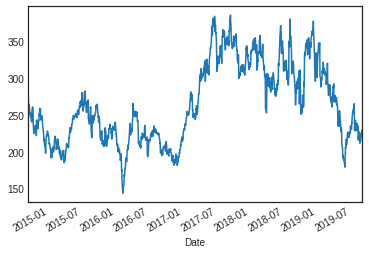

In [0]:
df["Adj Close"].plot()

Quite a but of variation is observed

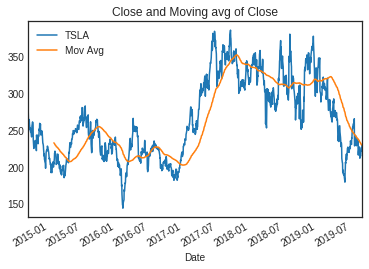

In [0]:
# exploring rolling mean to identify any trends

daily_close = df['Adj Close']
mavg = daily_close.rolling(window=100).mean()
daily_close.plot(label=STOCK_NAME)
mavg.plot(label='Mov Avg')
plt.title('Close and Moving avg of Close')
plt.legend()

There are definitely some periods of drops and increases

In [0]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,268.860278,259.923553,264.546248,264.536868,6.423401e+06,264.536868
std,54.482990,52.725051,53.666759,53.665565,3.991792e+06,53.665565
min,154.970001,141.050003,142.320007,143.669998,7.103000e+05,143.669998
25%,223.712498,217.042503,220.509998,219.952503,3.887650e+06,219.952503
50%,256.259995,249.105003,252.525002,252.979996,5.386650e+06,252.979996
75%,315.449997,305.377495,311.192497,310.402512,7.604025e+06,310.402512
max,389.609985,379.350006,386.690002,385.000000,3.364970e+07,385.000000


In [0]:
plt.boxplot(daily_close)

distribution of daily close

In [0]:
plt.hist(daily_close)

The deviation in stock prices are seen to be very high (10% to 15%)
This means the stock is not very stable and incurs high risk.

In [0]:
df_regression = df.loc[:,['Adj Close','Volume']]
#daily high to low variation to close
df_regression['high_low_diff'] = (df['High'] - df['Low']) / df['Close'] * 100.0
#percent change per close
df_regression['close_open_diff'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

Splitting the data into test and validate sets

In [0]:
skip_last = 45 
y = df_regression['Adj Close'].shift(-skip_last)[0:-skip_last]
X = df_regression[:-skip_last]
X_test = df_regression[-skip_last:]

df_new = df_regression[-skip_last:]
y_test = df_new['Adj Close']

In [0]:
y_test.shape

(45,)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(np.array(X), 
                                                  np.array(y), 
                                                  test_size = 0.2)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

clf_reg_lin = LinearRegression()
clf_reg_lin.fit(X_train, y_train)
pred_lin = clf_reg_lin.predict(X_val)
r2_lin = r2_score(y_val, pred_lin)

clf_reg_dt = DecisionTreeRegressor()
clf_reg_dt.fit(X_train, y_train)
pred_dt = clf_reg_dt.predict(X_val)
r2_dt = r2_score(y_val, pred_dt)

clf_reg_rf = RandomForestRegressor()
clf_reg_rf.fit(X_train, y_train)
pred_rf = clf_reg_rf.predict(X_val)
r2_rf = r2_score(y_val, pred_rf)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
print("R2 value for Linear Regression = {0}".format(r2_lin))
print("R2 value for Decision Tree Regression = {0}".format(r2_dt))
print("R2 value for Random Forest Regression = {0}".format(r2_rf))

R2 value for Linear Regression = 0.502146283581175
R2 value for Decision Tree Regression = 0.37458679349273916
R2 value for Random Forest Regression = 0.5819171124527733


In [0]:
future_pred_rf = clf_reg_rf.predict(X_test)
future_pred_lr = clf_reg_lin.predict(X_test)
future_pred_dt = clf_reg_dt.predict(X_test)

df_new['Adj Close Pred RF'] = future_pred_rf
df_new['Adj Close Pred LR'] = future_pred_lr
df_new['Adj Close Pred DT'] = future_pred_dt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [0]:
print('R2 score for test data using the Random Forest: {:04.3f}'.format(r2_score(future_pred_rf, y_test)))
print('R2 score for test data using the Linear Model: {:04.3f}'.format(r2_score(future_pred_lr, y_test)))
print('R2 score for test data using the Decition Tree: {:04.3f}'.format(r2_score(future_pred_dt, y_test)))

R2 score for test data using the Random Forest: 0.052
R2 score for test data using the Linear Model: -0.156
R2 score for test data using the Decition Tree: 0.063


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


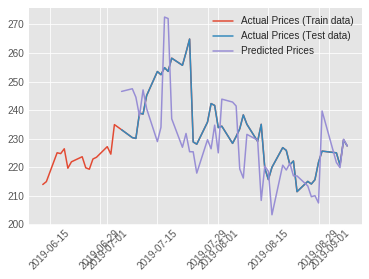

In [0]:
fig = plt.figure(1)
ax = fig.add_subplot(111)

plt.style.use('ggplot')

pt = plt.plot(df['Adj Close'][-60:], label='Actual Prices (Train data)')

df_new.loc[df['Adj Close'].index[-1]] = df['Adj Close'][-1]
df_new.sort_index(inplace=True)

plt.plot(df_new['Adj Close'], label='Actual Prices (Test data)')
plt.plot(df_new['Adj Close Pred RF'], label='Predicted Prices')
ax.tick_params(axis ='x', rotation =45) 
plt.legend();

We achive very low accuract and we can see that the pedicted stock prices are very different from actual prices.

This leads us to a hypothesis that the stock prices are dependent on more than just the past stock values as a time-series data and there are other external features that need to be explored.